In [1]:
import os
from sktime.datasets import load_from_ucr_tsv_to_dataframe
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np

import matplotlib.pyplot as plt
from utils import *
from sklearn.preprocessing import MinMaxScaler

In [2]:
datasets = get_all_datasets()

In [3]:
method='tsfresh'

all_datasets = []

for dataset in datasets[::15]:
    print(dataset)
    X_test, y_test = load_from_ucr_tsv_to_dataframe(
    os.path.join('UCRArchive_2018/', f"{dataset}/{dataset}_TEST.tsv")
    )
    
    X_test = interpolate_scale_single(X_test)
    all_datasets.append(X_test.sample(n=50, replace=True))
df = pd.concat(all_datasets, axis=0).reset_index(drop=True)

DodgerLoopWeekend
SwedishLeaf
LargeKitchenAppliances
GunPointMaleVersusFemale
BeetleFly
Rock
FaceFour
GesturePebbleZ1
Chinatown


In [7]:
embedding = feature_factory(method, 0)
df_t = embedding.fit_transform(df)
df_t

dim_0__variance_larger_than_standard_deviation  dim_0__has_duplicate_max  \
0                                               0.0                       0.0   
1                                               0.0                       0.0   
2                                               0.0                       0.0   
3                                               0.0                       0.0   
4                                               0.0                       0.0   
..                                              ...                       ...   
445                                             0.0                       0.0   
446                                             0.0                       0.0   
447                                             0.0                       0.0   
448                                             0.0                       0.0   
449                                             0.0                       0.0   

     dim_0__has_duplicate_min  dim_0__has_duplicate  dim_0__sum_values  \
0                         1.0                   1.0         -21.407407   
1                         1.0                   1.0         -23.000000   
2                         1.0                   1.0         -20.360000   
3                         0.0                   1.0         -14.962963   
4                         1.0                   1.0          55.800000   
..                        ...                   ...                ...   
445                       0.0                   0.0           5.483544   
446                       0.0                   0.0           2.875991   
447                       0.0                   0.0           3.582738   
448                       0.0                   0.0           3.327546   
449                       0.0                   0.0          -2.962963   

     dim_0__abs_energy  dim_0__mean_abs_change  dim_0__mean_change  \
0            81.336077                0.204930            0.000000   
1            90.100800                0.193449            0.000279   
2            85.875200                0.205575           -0.000418   
3           121.813138                0.293543            0.000000   
4           146.155556                0.298258           -0.001858   
..                 ...                     ...                 ...   
445           7.448636                0.142378            0.003577   
446           6.269624                0.129623            0.011339   
447           6.491352                0.149417           -0.013123   
448           6.970714                0.163748            0.006240   
449           6.535448                0.120249            0.029538   

     dim_0__mean_second_derivative_central  dim_0__median  ...  \
0                            -1.295001e-04            0.0  ...   
1                             4.895105e-04            0.0  ...   
2                            -1.940949e-19            0.0  ...   
3                            -3.453337e-04            0.0  ...   
4                            -5.827506e-04            0.0  ...   
..                                     ...            ...  ...   
445                          -1.409666e-03            0.0  ...   
446                          -7.647428e-03            0.0  ...   
447                          -1.684839e-04            0.0  ...   
448                          -2.472643e-03            0.0  ...   
449                           6.574622e-04            0.0  ...   

     dim_0__fourier_entropy__bins_5  dim_0__fourier_entropy__bins_10  \
0                          0.159721                         0.204871   
1                          0.136002                         0.181214   
2                          0.181214                         0.181214   
3                          0.181214                         0.181214   
4                          0.090729                         0.136002   
..                              ...                              ...   
445  

/tmp/ipykernel_1230509/1180899683.py:14: RuntimeWarning: divide by zero encountered in log
  logged = np.log(np.abs(arr))
/tmp/ipykernel_1230509/1180899683.py:31: RuntimeWarning: overflow encountered in exp
  value = np.exp(np.abs(x))


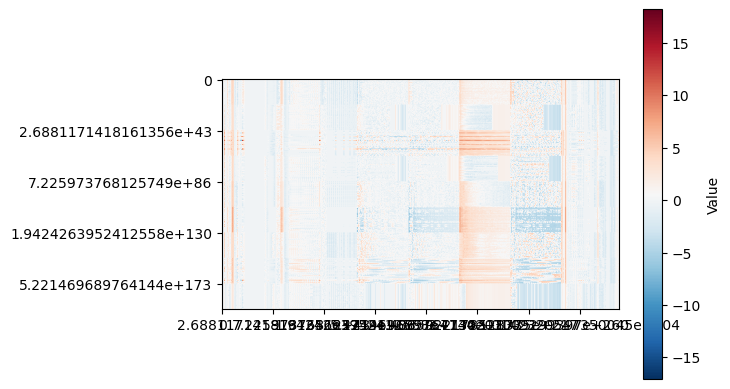

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data: values from -100 to 100.
data = df_t.to_numpy()

# Threshold for linear region (you can adjust this)
linthresh = 0.05

# Define the symlog function
def symlog(arr, linthresh):
    """Apply symlog scale to an array."""
    sign = np.sign(arr)
    logged = np.log(np.abs(arr))
    logged[np.abs(arr) < linthresh] = 0
    return sign * logged

# Transform the data
transformed_data = symlog(data, linthresh)

# Plot the transformed data
fig, ax = plt.subplots()
cax = ax.imshow(transformed_data, cmap='RdBu_r')

# Fix the tick labels
def symlog_ticklabel_formatter(x, pos, linthresh=linthresh):
    """Generate tick labels in symlog scale."""
    if x == 0:
        return str(0)
    sign = np.sign(x)
    value = np.exp(np.abs(x))
    if value < linthresh:
        return str(sign * value)
    return str(sign * value)

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(symlog_ticklabel_formatter)
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)

# Display the colorbar
cbar = plt.colorbar(cax)
cbar.set_label('Value')

plt.show()

In [5]:
sdfsf=sdfsf

NameError: name 'sdfsf' is not defined

In [ ]:
datasets = np.unique([x.split('/')[1] for x in glob.glob(f'representation/*/*')])
print(len(datasets))
datasets

In [ ]:
#datasets = [x.split('/')[-1] for x in glob.glob('UCRArchive_2018/*')]

In [ ]:
samples = []
for dataset in datasets:
    X_test, y_test = load_from_ucr_tsv_to_dataframe(
        os.path.join('UCRArchive_2018/', f"{dataset}/{dataset}_TEST.tsv")
    )
    samples.append(X_test.sample(20))
X = pd.concat(samples, axis=0, ignore_index=True)

In [ ]:
X.shape

In [ ]:
X = interpolate_scale_single(X)

In [ ]:
X

In [ ]:
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
t = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False)
Xt = t.fit_transform(X)

In [ ]:
Xt.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xts = scaler.fit_transform(Xt)

In [ ]:
Xts.shape

In [ ]:
plt.figure(figsize=(15, 10))
plt.imshow(Xts)

In [ ]:
#sdfsf=sdfsf

In [ ]:
#method='tsfresh'
#run='1'

#all_datasets = []

#for dataset in datasets:
#    base = f'representation/{dataset}/{method}_WhiteNoise;0_{run}/train.parquet'
#    X_train_rep = pd.read_parquet(base)
#    print(dataset, X_train_rep.sample(n=25).shape)
#    all_datasets.append(X_train_rep.sample(n=25))

In [ ]:
#df = pd.concat(all_datasets, axis=0)

#scaler = MinMaxScaler()
#df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
#df = df.add(df.min())
#df = df.applymap(np.log1p)

#scaler = MinMaxScaler()
#df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

#cols_to_drop = [col for col in df.columns if df[col].min() == df[col].max()]
#df = df.drop(columns=cols_to_drop)

In [ ]:
#df.max(axis=0)

In [ ]:
#plt.figure(figsize=(14, 10))
#plt.imshow(df)

In [ ]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=20)
#df_pca = pca.fit_transform(df)
#plt.figure(figsize=(14, 10))
#
#scaler = MinMaxScaler()
#df_pca = pd.DataFrame(scaler.fit_transform(df_pca))
#
#plt.imshow(df_pca)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data: values from -100 to 100.
data = Xts

# Threshold for linear region (you can adjust this)
linthresh = 1.0

# Define the symlog function
def symlog(arr, linthresh):
    """Apply symlog scale to an array."""
    sign = np.sign(arr)
    logged = np.log(np.abs(arr))
    logged[np.abs(arr) < linthresh] = 0
    return sign * logged

# Transform the data
transformed_data = symlog(data, linthresh)

# Plot the transformed data
fig, ax = plt.subplots()
cax = ax.imshow(transformed_data, cmap='RdBu_r')

# Fix the tick labels
def symlog_ticklabel_formatter(x, pos, linthresh=linthresh):
    """Generate tick labels in symlog scale."""
    if x == 0:
        return str(0)
    sign = np.sign(x)
    value = np.exp(np.abs(x))
    if value < linthresh:
        return str(sign * value)
    return str(sign * value)

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(symlog_ticklabel_formatter)
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)

# Display the colorbar
cbar = plt.colorbar(cax)
cbar.set_label('Value')

plt.show()